Data preprocessing

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv('dataset.csv',nrows=10000)

In [3]:
# Delete unecessary columns. These data are not helpful to our research
data.drop('ID', axis=1, inplace=True)
data.drop("Description", axis=1, inplace=True)
data.drop("Number", axis=1, inplace=True)
data.drop("Zipcode", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Airport_Code", axis=1, inplace=True)
data.drop("Weather_Timestamp", axis=1, inplace=True)
data.drop("Pressure(in)", axis=1, inplace=True)
data.drop("Wind_Direction", axis=1, inplace=True)
data.drop("Wind_Speed(mph)", axis=1, inplace=True)
data.drop("Precipitation(in)", axis=1, inplace=True)
data.drop("Amenity", axis=1, inplace=True)
data.drop("Bump", axis=1, inplace=True)
data.drop("Crossing", axis=1, inplace=True)
data.drop("Give_Way", axis=1, inplace=True)
data.drop("Junction", axis=1, inplace=True)
data.drop("No_Exit", axis=1, inplace=True)
data.drop("Railway", axis=1, inplace=True)
data.drop("Roundabout", axis=1, inplace=True)
data.drop("Station", axis=1, inplace=True)
data.drop("Stop", axis=1, inplace=True)
data.drop("Traffic_Calming", axis=1, inplace=True)
data.drop("Traffic_Signal", axis=1, inplace=True)
data.drop("Turning_Loop", axis=1, inplace=True)
data.drop("Start_Time", axis=1, inplace=True)
data.drop("End_Time", axis=1, inplace=True)
data.drop("Start_Lat", axis=1, inplace=True)
data.drop("Start_Lng", axis=1, inplace=True)
data.drop("End_Lat", axis=1, inplace=True)
data.drop("End_Lng", axis=1, inplace=True)
data.drop("Wind_Chill(F)", axis=1, inplace=True)

In [4]:
# Delete missing values
# We will remove every row that has at least one missing value (NaN)
data.dropna(axis=0,inplace=True)

# Delete duplicate rows
data.drop_duplicates(inplace = True)

In [5]:
# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [6]:
# select the last 4 columns from the dataset
last_4_columns  = data.iloc[: , -4:]

# convert each record of these columns. Night == 0 and Day == 1
last_4_columns["Sunrise_Sunset"] = np.where(last_4_columns["Sunrise_Sunset"] == "Night", 0, 1)
last_4_columns["Civil_Twilight"] = np.where(last_4_columns["Civil_Twilight"] == "Night", 0, 1)
last_4_columns["Nautical_Twilight"] = np.where(last_4_columns["Nautical_Twilight"] == "Night", 0, 1)
last_4_columns["Astronomical_Twilight"] = np.where(last_4_columns["Astronomical_Twilight"] == "Night", 0, 1)

# find the mean of each row of the last_4_columns dataframe
last_4_columns = last_4_columns.mean(axis=1)

# convert the values of the last_4_rows dataframe into 0 and 1, based in a condition
# if the mean of a row is <0,5, then the value of this row will be 0, else it will be 1
for i in range (len(last_4_columns)):
    if last_4_columns[i] < 0.5:
        last_4_columns[i] = 0
    else:
        last_4_columns[i] = 1

In [7]:
# convert R and L to 0 and 1 respectively. That means that R is 0 and L is 1.
data["Side"] = np.where(data['Side'] == "R", 0, 1)

In [8]:
# delete the last 4 columns of the dataset
# we do not need them, as we can combine them in a new column
data.drop('Sunrise_Sunset', axis=1, inplace=True)
data.drop('Civil_Twilight', axis=1, inplace=True)
data.drop('Nautical_Twilight', axis=1, inplace=True)
data.drop('Astronomical_Twilight', axis=1, inplace=True)

In [9]:
# add a new column to the dataset.
# this new column will be the "last_4_columns" dataframe that we calculated earlier
data.insert(12,"Day_Night",last_4_columns)

In [10]:
# Change Columns Data Types

# Converting Day_Night column from float to int
data = data.astype({"Day_Night": int})

# round all the values of "Temperature(F)" column
data["Temperature(F)"] = data["Temperature(F)"].round(0)

In [11]:
# delete outliers from the dataset using the IQR method.
# We will focus only in columns: Temperature(F), Distance(mi) and Humidity(%)
for x in ["Temperature(F)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Distance(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Humidity(%)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Visibility(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr) - 5 # In order to keep values other than 10 (Ex. 5.5,6,7,8,9,10)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan


#---------------------------------------------------------------#

# Delete rows that contain nulls (outliers)
data.dropna(axis=0,inplace=True)

# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [12]:
# Discretization of the column "Weather_Condition"

# we have separated all unique weather conditions of the dataset into three lists (bad_weather,medium_weather and perfect_weather).
# This separation has been done according to our opinion.
bad_weather = ['Patches of Fog','Haze','Smoke','Light Snow','Snow Grains','Squalls','Shallow Fog','Thunderstorm','Light Ice Pellets','Light Thunderstorms and Rain','Thunder','Thunder in the Vicinity','Thunderstorms and Rain',
'Heavy Rain','Widespread Dust','Blowing Dust / Windy','Blowing Snow','Tornado','Light Snow / Windy','Fog','Mist','Light Snow Showers','T-Storm','T-Storm / Windy','Wintry Mix','Volcanic Ash','Light Rain with Thunder',
'Heavy Thunderstorms and Rain', 'Haze / Windy',
'Dust Whirls','Light Snow and Sleet','Thunder / Windy','Snow','Heavy T-Storm / Windy','Heavy T-Storm','Light Snow and Sleet / Windy','Heavy Drizzle',
'Light Sleet','Sand / Dust Whirlwinds','Patches of Fog / Windy','Low Drifting Snow','Blowing Snow Nearby','Heavy Rain / Windy','Squalls / Windy','Sand / Dust Whirls Nearby',
'Wintry Mix / Windy','Sleet']

medium_weather = ['Light Rain','Overcast','Mostly Cloudy', 'Cloudy','Scattered Clouds','Drizzle','Light Drizzle','Light Freezing Drizzle','Rain','Fair / Windy','Light Freezing Rain','Cloudy / Windy','Partly Cloudy / Windy',
'Light Rain Showers','Light Rain / Windy','Mostly Cloudy / Windy','Blowing Dust','Funnel Cloud','Light Rain Shower','Smoke / Windy','Light Rain Shower / Windy','Rain Shower','Sand / Dust Whirlwinds / Windy','Rain Showers',
'Light Drizzle / Windy','Showers in the Vicinity','Widespread Dust / Windy','Light Freezing Rain / Windy''N/A Precipitation','Rain / Windy',
'Light Sleet / Windy','Hail','Drizzle / Windy','Light Haze']

perfect_weather = ['Clear','Fair','Partly Cloudy','Small Hail']

# change the values of the column "Weather_Condition" column
# Now, column "Weather_Condition" has only records: "Bad","Medium" and "Perfect"
for i in range(len(data["Weather_Condition"])):
    if data["Weather_Condition"][i] in bad_weather:
        data.at[i,"Weather_Condition"] = "Bad"

    elif data["Weather_Condition"][i] in medium_weather:
        data.at[i,"Weather_Condition"] = "Medium"
    else:
         data.at[i,"Weather_Condition"] = "Perfect"

Data visualization

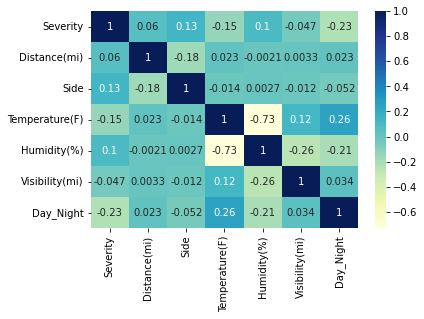

In [13]:
# show the correlation of data using Heatmap
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Clusstering

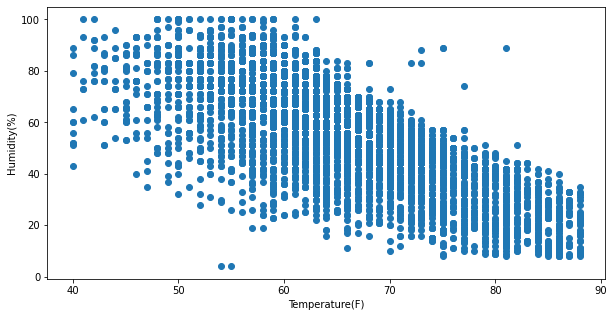

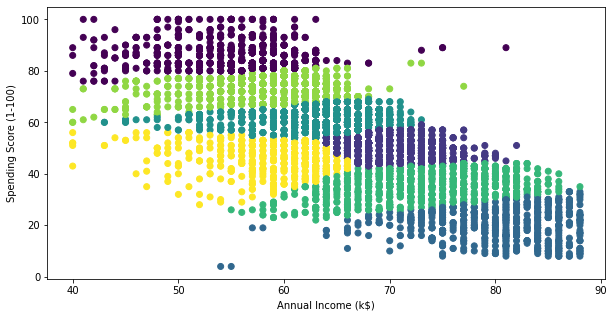

In [14]:
# stroing two attributes
X = data.loc[:, ['Temperature(F)', 'Humidity(%)']]

# importing the module
import matplotlib.pyplot as plt 

# image size
plt.figure(figsize=(10,5))

# ploting scatered graph
plt.scatter(x= X['Temperature(F)'], y=X['Humidity(%)'])
plt.xlabel('Temperature(F)')
plt.ylabel('Humidity(%)');

#importing the k-means
from sklearn.cluster import KMeans

# cluster size is set to be 3
km = KMeans(n_clusters = 7)
km.fit(X)

# ploting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

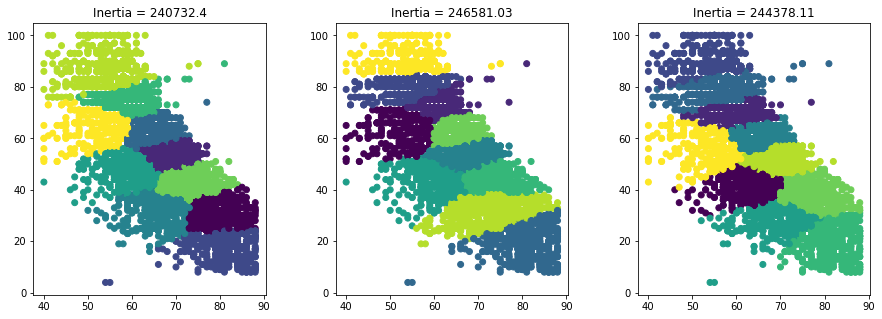

In [15]:
# creating graph in one line
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.3}, figsize=(15,5))

# for loop 
for i in range(3):
    km = KMeans(n_clusters =10, init='random', n_init=1, random_state=i)
    km.fit(X)
    ax[i].scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)

#     printing the interia with graphs
    ax[i].set_title(f"Inertia = {round(km.inertia_, 2)}");

In [35]:
weather = data["Weather_Condition"]

weather = np.where(weather == "Bad", 0, 1)

weather = pd.DataFrame(weather)

weather[0].unique()



data.insert(13,"Weather",weather)
data

        




,Severity,Distance(mi),Street,Side,City,County,State,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Day_Night,Weather
0,2,0.222,Norwood Lateral Expy W,0,Cincinnati,Hamilton,OH,US/Eastern,43.0,51.0,10.0,Perfect,1,1
1,2,0.030,I-471 N,0,Cincinnati,Hamilton,OH,US/Eastern,40.0,60.0,10.0,Perfect,1,1
2,2,0.201,I-75 S,0,Cincinnati,Hamilton,OH,US/Eastern,40.0,60.0,10.0,Perfect,0,1
3,2,0.093,S Main St,0,Englewood,Montgomery,OH,US/Eastern,43.0,60.0,10.0,Medium,1,1
4,3,0.205,Pfeiffer Rd,0,Cincinnati,Hamilton,OH,US/Eastern,42.0,62.0,10.0,Perfect,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,2,0.237,Balboa Ave,0,San Diego,San Diego,CA,US/Pacific,63.0,65.0,10.0,Medium,1,1
7982,2,0.024,Armour St,0,San Diego,San Diego,CA,US/Pacific,63.0,65.0,10.0,Medium,1,1
7983,2,0.348,Riverside Fwy E,0,Anaheim,Orange,CA,US/Pacific,68.0,52.0,10.0,Medium,1,1
7984,2,0.696,I-405 N,0,Fountain Valley,Orange,CA,US/Pacific,65.0,61.0,10.0,Medium,1,1


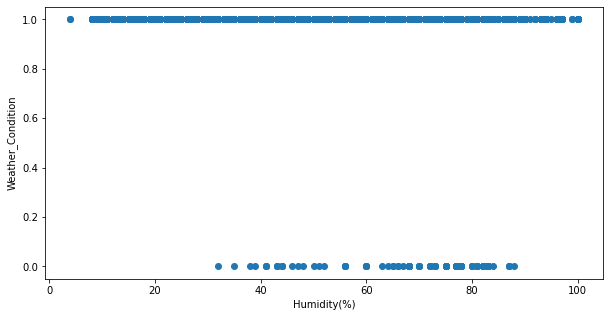

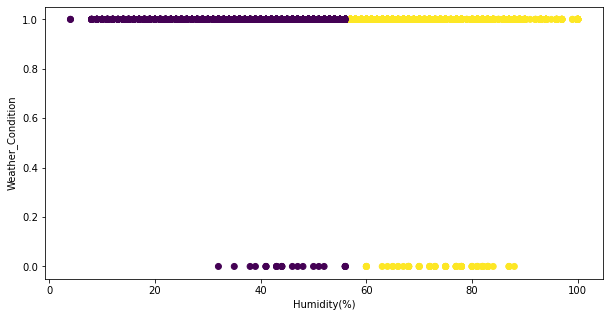

In [39]:
# stroing two attributes
X = data.loc[:, ['Humidity(%)', 'Weather']]

# importing the module
import matplotlib.pyplot as plt 

# image size
plt.figure(figsize=(10,5))

# ploting scatered graph
plt.scatter(x= X['Humidity(%)'], y=X['Weather'])
plt.xlabel('Humidity(%)')
plt.ylabel('Weather_Condition');

#importing the k-means
from sklearn.cluster import KMeans

# cluster size is set to be 3
km = KMeans(n_clusters = 2)
km.fit(X)

# ploting the graph of the clusters
plt.figure(figsize=(10,5))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.xlabel('Humidity(%)')
plt.ylabel('Weather_Condition');